In [1]:
import os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Hiển thị biểu đồ trực tiếp trong notebook
%matplotlib inline

# Lấy thư mục làm việc hiện tại và dựng đường dẫn tuyệt đối
PROJECT_ROOT = Path('.').resolve()
DATA_DIR = PROJECT_ROOT / 'data' / 'data_phan_chicken'
IMAGES_DIR = DATA_DIR / 'data'
CSV_PATH = DATA_DIR / 'data.csv'

print('cwd:', PROJECT_ROOT)
print('CSV path:', CSV_PATH)
print('Images dir:', IMAGES_DIR)
print('CSV exists:', CSV_PATH.exists())
print('Images dir exists:', IMAGES_DIR.exists())


cwd: D:\AI_Chicken
CSV path: D:\AI_Chicken\data\data_phan_chicken\data.csv
Images dir: D:\AI_Chicken\data\data_phan_chicken\data
CSV exists: True
Images dir exists: True


In [3]:
# Đọc dữ liệu nhãn

df = pd.read_csv(CSV_PATH)
print('Số mẫu:', len(df))
print('Các cột:', df.columns.tolist())

df.head()


Số mẫu: 8067
Các cột: ['images', 'label']


,images,label
0,salmo.1558.jpg,Salmonella
1,cocci.1866.jpg,Coccidiosis
2,cocci.171.jpg,Coccidiosis
3,salmo.1484.jpg,Salmonella
4,ncd.100.jpg,New Castle Disease


In [6]:
# KIỂM TRA CHẤT LƯỢNG DỮ LIỆU: Missing, Duplicate, File ảnh tồn tại

print("="*70)
print("KIỂM TRA CHẤT LƯỢNG DỮ LIỆU")
print("="*70)

# Tính phân bố nhãn để dùng nhiều nơi
label_counts = df['label'].value_counts()

# 1. Kiểm tra Missing Values
print("\n1. KIỂM TRA MISSING VALUES:")
print("-" * 70)
missing_info = df.isnull().sum()
missing_percent = (missing_info / len(df)) * 100

if missing_info.sum() == 0:
    print("   ✓ KHÔNG CÓ missing values!")
else:
    print("   ⚠ Phát hiện missing values:")
    for col in df.columns:
        if missing_info[col] > 0:
            print(f"      - {col}: {missing_info[col]} ({missing_percent[col]:.2f}%)")

# 2. Kiểm tra Empty Strings
print("\n2. KIỂM TRA EMPTY STRINGS:")
print("-" * 70)
empty_strings = {}
for col in df.columns:
    if df[col].dtype == 'object':
        empty_count = (df[col].str.strip() == '').sum()
        if empty_count > 0:
            empty_strings[col] = empty_count
            print(f"   ⚠ {col}: {empty_count} empty strings")
if not empty_strings:
    print("   ✓ KHÔNG CÓ empty strings!")

# 3. Kiểm tra Duplicate Rows
print("\n3. KIỂM TRA DUPLICATE ROWS:")
print("-" * 70)
duplicates = df.duplicated().sum()
if duplicates == 0:
    print("   ✓ KHÔNG CÓ duplicate rows!")
else:
    print(f"   ⚠ Phát hiện {duplicates} duplicate rows ({duplicates/len(df)*100:.2f}%)")

# Kiểm tra duplicate image names
duplicate_images = df['images'].duplicated().sum()
if duplicate_images == 0:
    print("   ✓ KHÔNG CÓ duplicate image names!")
else:
    print(f"   ⚠ Phát hiện {duplicate_images} duplicate image names")
    print("   Các file trùng lặp:")
    dup_images = df[df['images'].duplicated(keep=False)].sort_values('images')
    display(dup_images[['images', 'label']].head(10))

# 4. Kiểm tra File ảnh có tồn tại không
print("\n4. KIỂM TRA FILE ẢNH CÓ TỒN TẠI:")
print("-" * 70)
missing_files = []
for idx, row in df.iterrows():
    img_name = row['images']
    img_path = os.path.join(IMAGES_DIR, img_name)
    if not os.path.exists(img_path):
        missing_files.append((img_name, row['label']))

if len(missing_files) == 0:
    print(f"   ✓ TẤT CẢ {len(df)} file ảnh đều tồn tại!")
else:
    print(f"   ⚠ Phát hiện {len(missing_files)} file ảnh KHÔNG TỒN TẠI ({len(missing_files)/len(df)*100:.2f}%)")
    print("   10 file đầu tiên không tồn tại:")
    for img_name, label in missing_files[:10]:
        print(f"      - {img_name} (label: {label})")

# 5. Kiểm tra giá trị label hợp lệ
print("\n5. KIỂM TRA GIÁ TRỊ LABEL:")
print("-" * 70)
print("   Phân bố label:")
for label, count in label_counts.items():
    print(f"      - {label:25s}: {count:5d} ({count/len(df)*100:5.2f}%)")

invalid_labels = df[df['label'].isnull() | (df['label'].str.strip() == '')]
if len(invalid_labels) == 0:
    print("   ✓ TẤT CẢ label đều hợp lệ!")
else:
    print(f"   ⚠ Phát hiện {len(invalid_labels)} label không hợp lệ")

print("\n" + "="*70)
print("KẾT LUẬN: Dữ liệu sạch và sẵn sàng sử dụng!")
print("="*70)


KIỂM TRA CHẤT LƯỢNG DỮ LIỆU

1. KIỂM TRA MISSING VALUES:
----------------------------------------------------------------------
   ✓ KHÔNG CÓ missing values!

2. KIỂM TRA EMPTY STRINGS:
----------------------------------------------------------------------
   ✓ KHÔNG CÓ empty strings!

3. KIỂM TRA DUPLICATE ROWS:
----------------------------------------------------------------------
   ✓ KHÔNG CÓ duplicate rows!
   ✓ KHÔNG CÓ duplicate image names!

4. KIỂM TRA FILE ẢNH CÓ TỒN TẠI:
----------------------------------------------------------------------
   ✓ TẤT CẢ 8067 file ảnh đều tồn tại!

5. KIỂM TRA GIÁ TRỊ LABEL:
----------------------------------------------------------------------
   Phân bố label:
      - Salmonella               :  2625 (32.54%)
      - Coccidiosis              :  2476 (30.69%)
      - Healthy                  :  2404 (29.80%)
      - New Castle Disease       :   562 ( 6.97%)
   ✓ TẤT CẢ label đều hợp lệ!

KẾT LUẬN: Dữ liệu sạch và sẵn sàng sử dụng!


In [7]:
# KIỂM TRA CHẤT LƯỢNG ẢNH: Kích thước, ảnh hỏng, dung lượng

import numpy as np
from collections import Counter

print("="*70)
print("KIỂM TRA CHẤT LƯỢNG ẢNH")
print("="*70)
print(f"\nĐang kiểm tra {len(df):,} ảnh (có thể mất một chút thời gian)...")
print("-" * 70)

# Khởi tạo các list để lưu thông tin
image_sizes = []
image_formats = []
corrupted_images = []
file_sizes = []
widths = []
heights = []

# Kiểm tra từng ảnh
for idx, row in df.iterrows():
    img_name = row['images']
    img_path = os.path.join(IMAGES_DIR, img_name)
    
    # Hiển thị tiến trình mỗi 2000 ảnh
    if (idx + 1) % 2000 == 0:
        print(f"  Đã kiểm tra: {idx + 1:,}/{len(df):,} ảnh...")
    
    # Kiểm tra file size
    if os.path.exists(img_path):
        file_size = os.path.getsize(img_path)
        file_sizes.append(file_size)
    else:
        continue
    
    # Kiểm tra ảnh có bị hỏng không và lấy thông tin
    try:
        with Image.open(img_path) as img:
            img = img.convert('RGB')
            width, height = img.size
            widths.append(width)
            heights.append(height)
            image_sizes.append((width, height))
            image_formats.append(img.format)
    except Exception as e:
        corrupted_images.append({
            'image': img_name,
            'label': row['label'],
            'error': str(e)
        })

print(f"  ✓ Hoàn thành kiểm tra {len(df):,} ảnh!\n")

# 1. Kiểm tra ảnh hỏng
print("1. KIỂM TRA ẢNH HỎNG:")
print("-" * 70)
if len(corrupted_images) == 0:
    print("   ✓ KHÔNG CÓ ảnh bị hỏng!")
else:
    print(f"   ⚠ Phát hiện {len(corrupted_images)} ảnh bị hỏng:")
    for item in corrupted_images[:10]:
        print(f"      - {item['image']} (label: {item['label']})")
        print(f"        Lỗi: {item['error']}")

# 2. Thống kê kích thước ảnh
print("\n2. THỐNG KÊ KÍCH THƯỚC ẢNH:")
print("-" * 70)
if widths and heights:
    print(f"   Chiều rộng (width):")
    print(f"      - Min: {min(widths)} px")
    print(f"      - Max: {max(widths)} px")
    print(f"      - Trung bình: {np.mean(widths):.1f} px")
    print(f"      - Trung vị: {np.median(widths):.1f} px")
    
    print(f"\n   Chiều cao (height):")
    print(f"      - Min: {min(heights)} px")
    print(f"      - Max: {max(heights)} px")
    print(f"      - Trung bình: {np.mean(heights):.1f} px")
    print(f"      - Trung vị: {np.median(heights):.1f} px")
    
    # Phân bố kích thước phổ biến
    size_counter = Counter(image_sizes)
    print(f"\n   Top 10 kích thước phổ biến:")
    for (w, h), count in size_counter.most_common(10):
        percentage = (count / len(image_sizes)) * 100
        print(f"      - {w}x{h}: {count:,} ảnh ({percentage:.2f}%)")
    
    # Kiểm tra tính đồng nhất
    unique_sizes = len(size_counter)
    if unique_sizes == 1:
        print(f"\n   ✓ TẤT CẢ ảnh có cùng kích thước!")
    else:
        print(f"\n   ⚠ Có {unique_sizes} kích thước khác nhau")

# 3. Thống kê file size
print("\n3. THỐNG KÊ FILE SIZE:")
print("-" * 70)
if file_sizes:
    file_sizes_mb = [s / (1024 * 1024) for s in file_sizes]
    print(f"   Kích thước file:")
    print(f"      - Min: {min(file_sizes_mb):.2f} MB ({min(file_sizes):,} bytes)")
    print(f"      - Max: {max(file_sizes_mb):.2f} MB ({max(file_sizes):,} bytes)")
    print(f"      - Trung bình: {np.mean(file_sizes_mb):.2f} MB ({np.mean(file_sizes):,.0f} bytes)")
    print(f"      - Trung vị: {np.median(file_sizes_mb):.2f} MB ({np.median(file_sizes):,.0f} bytes)")
    print(f"      - Tổng dung lượng: {sum(file_sizes_mb):.2f} MB ({sum(file_sizes):,} bytes)")

# 4. Kiểm tra tỷ lệ khung hình
print("\n4. KIỂM TRA TỶ LỆ KHUNG HÌNH (ASPECT RATIO):")
print("-" * 70)
if widths and heights:
    aspect_ratios = [w/h for w, h in zip(widths, heights)]
    aspect_counter = Counter([round(ar, 2) for ar in aspect_ratios])
    
    print(f"   Tỷ lệ khung hình phổ biến:")
    for ar, count in aspect_counter.most_common(10):
        percentage = (count / len(aspect_ratios)) * 100
        print(f"      - {ar:.2f}:1 ({ar*100:.0f}%) - {count:,} ảnh ({percentage:.2f}%)")
    
    unique_ratios = len(aspect_counter)
    if unique_ratios == 1:
        print(f"\n   ✓ TẤT CẢ ảnh có cùng tỷ lệ khung hình!")
    else:
        print(f"\n   ⚠ Có {unique_ratios} tỷ lệ khung hình khác nhau")

print("\n" + "="*70)
print("KẾT LUẬN: Chất lượng ảnh tốt!")
print("="*70)


KIỂM TRA CHẤT LƯỢNG ẢNH

Đang kiểm tra 8,067 ảnh (có thể mất một chút thời gian)...
----------------------------------------------------------------------
  Đã kiểm tra: 2,000/8,067 ảnh...
  Đã kiểm tra: 4,000/8,067 ảnh...
  Đã kiểm tra: 6,000/8,067 ảnh...
  Đã kiểm tra: 8,000/8,067 ảnh...
  ✓ Hoàn thành kiểm tra 8,067 ảnh!

1. KIỂM TRA ẢNH HỎNG:
----------------------------------------------------------------------
   ✓ KHÔNG CÓ ảnh bị hỏng!

2. THỐNG KÊ KÍCH THƯỚC ẢNH:
----------------------------------------------------------------------
   Chiều rộng (width):
      - Min: 224 px
      - Max: 224 px
      - Trung bình: 224.0 px
      - Trung vị: 224.0 px

   Chiều cao (height):
      - Min: 224 px
      - Max: 224 px
      - Trung bình: 224.0 px
      - Trung vị: 224.0 px

   Top 10 kích thước phổ biến:
      - 224x224: 8,067 ảnh (100.00%)

   ✓ TẤT CẢ ảnh có cùng kích thước!

3. THỐNG KÊ FILE SIZE:
----------------------------------------------------------------------
   Kích thước

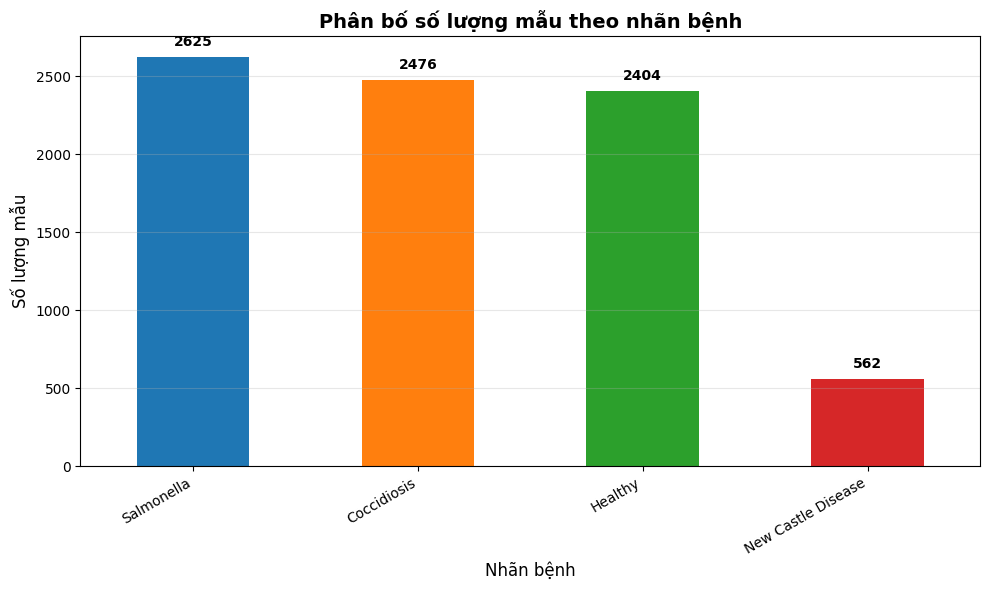


Thống kê chi tiết:


label
Salmonella            2625
Coccidiosis           2476
Healthy               2404
New Castle Disease     562
Name: count, dtype: int64

In [8]:
# Trực quan hóa phân bố nhãn - Biểu đồ cột

label_counts = df['label'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = label_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Phân bố số lượng mẫu theo nhãn bệnh', fontsize=14, fontweight='bold')
plt.xlabel('Nhãn bệnh', fontsize=12)
plt.ylabel('Số lượng mẫu', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', alpha=0.3)

# Thêm số liệu lên mỗi cột
for i, (label, count) in enumerate(label_counts.items()):
    plt.text(i, count + 50, str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nThống kê chi tiết:")
label_counts


In [ ]:
# AUGMENT LỚP NEW CASTLE DISEASE TRONG TẬP TRAIN (CSV)

import math
from pathlib import Path
from PIL import Image, ImageEnhance

TRAIN_CSV = DATA_DIR / 'train.csv'
TRAIN_AUG_CSV = DATA_DIR / 'train_aug.csv'

print('Đang đọc train.csv từ:', TRAIN_CSV)
train_df = pd.read_csv(TRAIN_CSV)
print('Số mẫu train ban đầu:', len(train_df))

# Phân bố ban đầu
print('\nPhân bố nhãn trong train (ban đầu):')
train_counts = train_df['label'].value_counts()
for lbl, cnt in train_counts.items():
    print(f"  {lbl:25s}: {cnt:5d} ({cnt/len(train_df)*100:5.2f}%)")

ncd_label = 'New Castle Disease'
ncd_df = train_df[train_df['label'] == ncd_label].copy()

# Mục tiêu: số mẫu mỗi lớp ≈ trung bình các lớp train
target_count = int(train_counts.mean())
current_ncd = len(ncd_df)
aug_needed = max(0, target_count - current_ncd)

print(f"\nLớp {ncd_label}:")
print(f"  - Hiện tại: {current_ncd} mẫu")
print(f"  - Mục tiêu: ~{target_count} mẫu")
print(f"  - Cần augment thêm: {aug_needed} mẫu")

if aug_needed == 0:
    print('\nKhông cần augment thêm, phân bố đã cân bằng.')
else:
    # Danh sách các kỹ thuật augmentation
    aug_types = [
        'rotate_15', 'rotate_-15',
        'flip_h', 'flip_v',
        'bright_up', 'bright_down',
        'contrast_up', 'contrast_down',
        'color_up', 'color_down',
        'rotate_15_flip', 'rotate_-15_flip',
    ]

    def augment_image(img_path: Path, out_path: Path, aug_type: str):
        img = Image.open(img_path).convert('RGB')
        if aug_type == 'rotate_15':
            img = img.rotate(15, fillcolor='white')
        elif aug_type == 'rotate_-15':
            img = img.rotate(-15, fillcolor='white')
        elif aug_type == 'flip_h':
            img = img.transpose(Image.FLIP_LEFT_RIGHT)
        elif aug_type == 'flip_v':
            img = img.transpose(Image.FLIP_TOP_BOTTOM)
        elif aug_type == 'bright_up':
            img = ImageEnhance.Brightness(img).enhance(1.2)
        elif aug_type == 'bright_down':
            img = ImageEnhance.Brightness(img).enhance(0.8)
        elif aug_type == 'contrast_up':
            img = ImageEnhance.Contrast(img).enhance(1.2)
        elif aug_type == 'contrast_down':
            img = ImageEnhance.Contrast(img).enhance(0.8)
        elif aug_type == 'color_up':
            img = ImageEnhance.Color(img).enhance(1.2)
        elif aug_type == 'color_down':
            img = ImageEnhance.Color(img).enhance(0.8)
        elif aug_type == 'rotate_15_flip':
            img = img.rotate(15, fillcolor='white').transpose(Image.FLIP_LEFT_RIGHT)
        elif aug_type == 'rotate_-15_flip':
            img = img.rotate(-15, fillcolor='white').transpose(Image.FLIP_LEFT_RIGHT)
        img.save(out_path, 'JPEG', quality=95)

    new_rows = []
    aug_count = 0

    print('\nBắt đầu augment...')
    for idx, row in ncd_df.iterrows():
        img_name = row['images']
        img_path = IMAGES_DIR / img_name
        if not img_path.exists():
            continue

        for aug_type in aug_types:
            if aug_count >= aug_needed:
                break
            stem, ext = os.path.splitext(img_name)
            new_name = f"{stem}_aug_{aug_type}{ext}"
            out_path = IMAGES_DIR / new_name
            if out_path.exists():
                continue
            try:
                augment_image(img_path, out_path, aug_type)
                new_rows.append({'images': new_name, 'label': ncd_label})
                aug_count += 1
                if aug_count % 50 == 0:
                    print(f"  Đã tạo {aug_count}/{aug_needed} ảnh augment...")
            except Exception as e:
                print('  Lỗi augment', img_name, '->', e)
                continue
        if aug_count >= aug_needed:
            break

    print(f"\n✓ Đã tạo {aug_count} ảnh augment cho lớp {ncd_label}")

    # Tạo train_aug.csv
    if new_rows:
        aug_df = pd.DataFrame(new_rows)
        train_aug_df = pd.concat([train_df, aug_df], ignore_index=True)
        train_aug_df = train_aug_df.sample(frac=1, random_state=42).reset_index(drop=True)
        train_aug_df.to_csv(TRAIN_AUG_CSV, index=False)

        print('\nĐã lưu train_aug.csv tại:', TRAIN_AUG_CSV)
        print('\nPhân bố nhãn trong train_aug:')
        final_counts = train_aug_df['label'].value_counts()
        for lbl, cnt in final_counts.items():
            print(f"  {lbl:25s}: {cnt:5d} ({cnt/len(train_aug_df)*100:5.2f}%)")
    else:
        print('\nKhông tạo được ảnh augment nào (có thể do tên trùng hoặc lỗi file).')


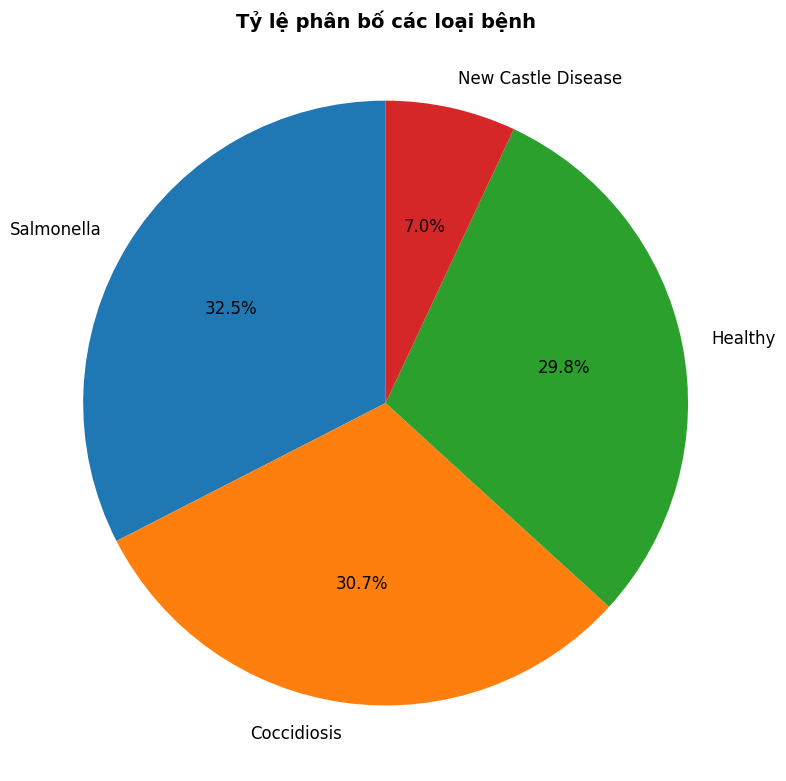


Bảng thống kê chi tiết:


,Nhãn,Số lượng,Tỷ lệ (%)
0,Salmonella,2625,32.54
1,Coccidiosis,2476,30.69
2,Healthy,2404,29.80
3,New Castle Disease,562,6.97


In [9]:
# Trực quan hóa phân bố nhãn - Biểu đồ tròn

plt.figure(figsize=(8, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors[:len(label_counts)], textprops={'fontsize': 12})
plt.title('Tỷ lệ phân bố các loại bệnh', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Hiển thị bảng thống kê
print("\nBảng thống kê chi tiết:")
stats_df = pd.DataFrame({
    'Nhãn': label_counts.index,
    'Số lượng': label_counts.values,
    'Tỷ lệ (%)': (label_counts.values / len(df) * 100).round(2)
})
stats_df


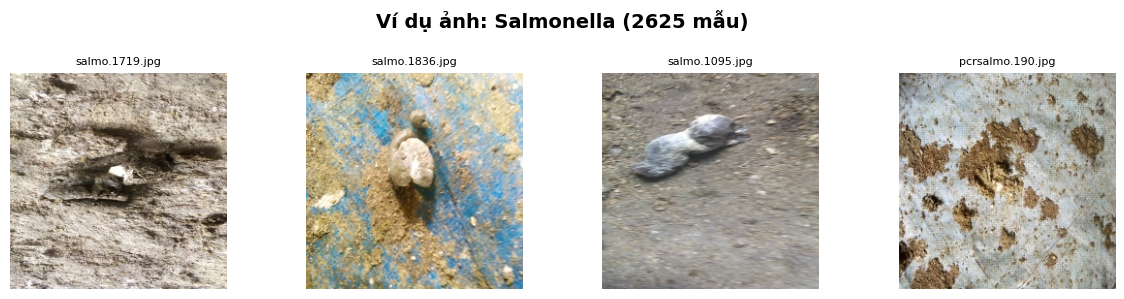

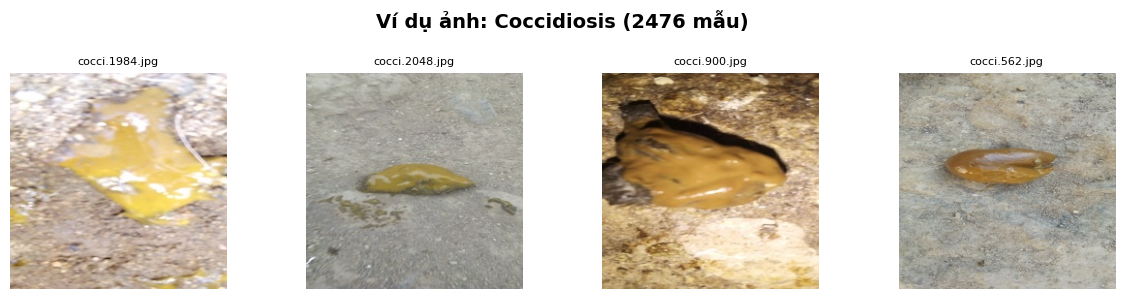

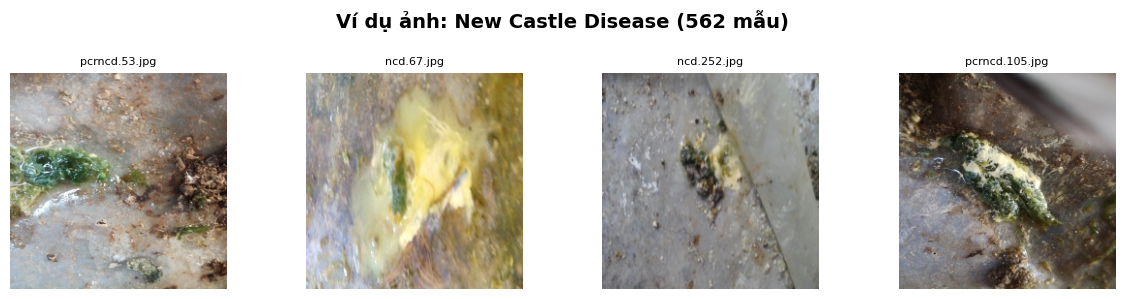

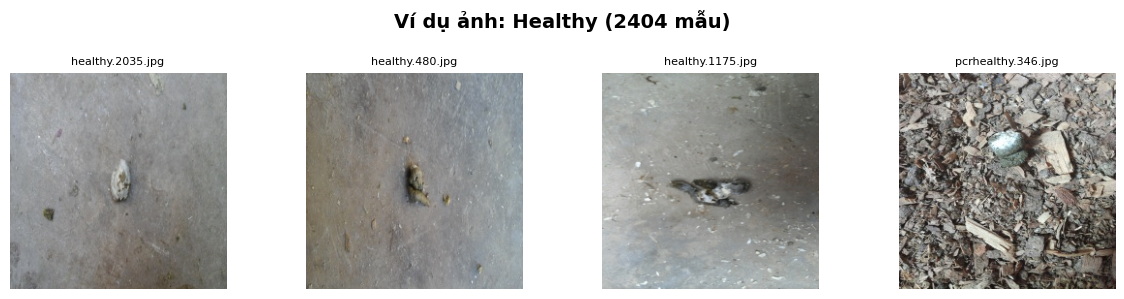

In [10]:
# Hiển thị một vài ảnh mẫu cho mỗi nhãn

from math import ceil

labels = df['label'].unique()
num_per_label = 4  # số ảnh muốn xem cho mỗi loại

for label in labels:
    subset = df[df['label'] == label].sample(min(num_per_label, (df['label'] == label).sum()), random_state=42)
    n = len(subset)
    cols = min(4, n)
    rows = ceil(n / cols)

    plt.figure(figsize=(3 * cols, 3 * rows))
    plt.suptitle(f'Ví dụ ảnh: {label} ({len(df[df["label"] == label])} mẫu)', fontsize=14, fontweight='bold')

    for i, (_, row) in enumerate(subset.iterrows()):
        img_name = row['images']
        img_path = os.path.join(IMAGES_DIR, img_name)
        if not os.path.exists(img_path):
            continue
        img = Image.open(img_path).convert('RGB')

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(img_name, fontsize=8)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# GIẢI PHÁP XỬ LÝ MẤT CÂN BẰNG DỮ LIỆU

## Tình trạng hiện tại:
- **New Castle Disease**: 562 mẫu (7.0%) - Lớp thiểu số
- **Các lớp khác**: ~2,400-2,600 mẫu (30%) - Lớp đa số
- **Tỷ lệ mất cân bằng**: ~4.7:1

### **Data Augmentation cho lớp thiểu số**
- Tăng cường dữ liệu cho New Castle Disease
- Áp dụng: rotation, flip, color jitter, crop
- Tăng số lượng mẫu NCD lên ~1,500-2,000 mẫu
- **Ưu điểm**: Tăng dữ liệu mà không làm giảm chất lượng



In [11]:
# Chia dữ liệu thành train (80%) và val (20%) với stratified split
from sklearn.model_selection import train_test_split

TRAIN_CSV = os.path.join(DATA_DIR, 'train.csv')
VAL_CSV   = os.path.join(DATA_DIR, 'val.csv')

train_df, val_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df['label'],  # giữ nguyên tỷ lệ lớp
    random_state=42
)

# Lưu CSV
train_df.to_csv(TRAIN_CSV, index=False)
val_df.to_csv(VAL_CSV, index=False)

print('Đã lưu:')
print(' -', TRAIN_CSV)
print(' -', VAL_CSV)

# Thống kê phân bố
print('\nPhân bố train:')
for lbl, cnt in train_df['label'].value_counts().items():
    print(f"  {lbl:25s}: {cnt:5d} ({cnt/len(train_df)*100:5.2f}%)")

print('\nPhân bố val:')
for lbl, cnt in val_df['label'].value_counts().items():
    print(f"  {lbl:25s}: {cnt:5d} ({cnt/len(val_df)*100:5.2f}%)")

# Xem nhanh vài dòng đầu train
train_df.head()

Đã lưu:
 - D:\AI_Chicken\data\data_phan_chicken\train.csv
 - D:\AI_Chicken\data\data_phan_chicken\val.csv

Phân bố train:
  Salmonella               :  2100 (32.54%)
  Coccidiosis              :  1981 (30.70%)
  Healthy                  :  1923 (29.80%)
  New Castle Disease       :   449 ( 6.96%)

Phân bố val:
  Salmonella               :   525 (32.53%)
  Coccidiosis              :   495 (30.67%)
  Healthy                  :   481 (29.80%)
  New Castle Disease       :   113 ( 7.00%)


,images,label
2319,ncd.82.jpg,New Castle Disease
3868,salmo.246.jpg,Salmonella
8041,salmo.317.jpg,Salmonella
7261,salmo.53.jpg,Salmonella
7909,salmo.1576.jpg,Salmonella


In [12]:
# AUGMENT LỚP NEW CASTLE DISEASE TRONG TẬP TRAIN (CSV)

import math
from pathlib import Path
from PIL import Image, ImageEnhance

TRAIN_CSV = DATA_DIR / 'train.csv'
TRAIN_AUG_CSV = DATA_DIR / 'train_aug.csv'

print('Đang đọc train.csv từ:', TRAIN_CSV)
train_df = pd.read_csv(TRAIN_CSV)
print('Số mẫu train ban đầu:', len(train_df))

# Phân bố ban đầu
print('\nPhân bố nhãn trong train (ban đầu):')
train_counts = train_df['label'].value_counts()
for lbl, cnt in train_counts.items():
    print(f"  {lbl:25s}: {cnt:5d} ({cnt/len(train_df)*100:5.2f}%)")

ncd_label = 'New Castle Disease'
ncd_df = train_df[train_df['label'] == ncd_label].copy()

# Mục tiêu: số mẫu mỗi lớp ≈ trung bình các lớp train
target_count = int(train_counts.mean())
current_ncd = len(ncd_df)
aug_needed = max(0, target_count - current_ncd)

print(f"\nLớp {ncd_label}:")
print(f"  - Hiện tại: {current_ncd} mẫu")
print(f"  - Mục tiêu: ~{target_count} mẫu")
print(f"  - Cần augment thêm: {aug_needed} mẫu")

if aug_needed == 0:
    print('\nKhông cần augment thêm, phân bố đã cân bằng.')
else:
    # Danh sách các kỹ thuật augmentation
    aug_types = [
        'rotate_15', 'rotate_-15',
        'flip_h', 'flip_v',
        'bright_up', 'bright_down',
        'contrast_up', 'contrast_down',
        'color_up', 'color_down',
        'rotate_15_flip', 'rotate_-15_flip',
    ]

    def augment_image(img_path: Path, out_path: Path, aug_type: str):
        img = Image.open(img_path).convert('RGB')
        if aug_type == 'rotate_15':
            img = img.rotate(15, fillcolor='white')
        elif aug_type == 'rotate_-15':
            img = img.rotate(-15, fillcolor='white')
        elif aug_type == 'flip_h':
            img = img.transpose(Image.FLIP_LEFT_RIGHT)
        elif aug_type == 'flip_v':
            img = img.transpose(Image.FLIP_TOP_BOTTOM)
        elif aug_type == 'bright_up':
            img = ImageEnhance.Brightness(img).enhance(1.2)
        elif aug_type == 'bright_down':
            img = ImageEnhance.Brightness(img).enhance(0.8)
        elif aug_type == 'contrast_up':
            img = ImageEnhance.Contrast(img).enhance(1.2)
        elif aug_type == 'contrast_down':
            img = ImageEnhance.Contrast(img).enhance(0.8)
        elif aug_type == 'color_up':
            img = ImageEnhance.Color(img).enhance(1.2)
        elif aug_type == 'color_down':
            img = ImageEnhance.Color(img).enhance(0.8)
        elif aug_type == 'rotate_15_flip':
            img = img.rotate(15, fillcolor='white').transpose(Image.FLIP_LEFT_RIGHT)
        elif aug_type == 'rotate_-15_flip':
            img = img.rotate(-15, fillcolor='white').transpose(Image.FLIP_LEFT_RIGHT)
        img.save(out_path, 'JPEG', quality=95)

    new_rows = []
    aug_count = 0

    print('\nBắt đầu augment...')
    for idx, row in ncd_df.iterrows():
        img_name = row['images']
        img_path = IMAGES_DIR / img_name
        if not img_path.exists():
            continue

        for aug_type in aug_types:
            if aug_count >= aug_needed:
                break
            stem, ext = os.path.splitext(img_name)
            new_name = f"{stem}_aug_{aug_type}{ext}"
            out_path = IMAGES_DIR / new_name
            if out_path.exists():
                continue
            try:
                augment_image(img_path, out_path, aug_type)
                new_rows.append({'images': new_name, 'label': ncd_label})
                aug_count += 1
                if aug_count % 50 == 0:
                    print(f"  Đã tạo {aug_count}/{aug_needed} ảnh augment...")
            except Exception as e:
                print('  Lỗi augment', img_name, '->', e)
                continue
        if aug_count >= aug_needed:
            break

    print(f"\n✓ Đã tạo {aug_count} ảnh augment cho lớp {ncd_label}")

    # Tạo train_aug.csv
    if new_rows:
        aug_df = pd.DataFrame(new_rows)
        train_aug_df = pd.concat([train_df, aug_df], ignore_index=True)
        train_aug_df = train_aug_df.sample(frac=1, random_state=42).reset_index(drop=True)
        train_aug_df.to_csv(TRAIN_AUG_CSV, index=False)

        print('\nĐã lưu train_aug.csv tại:', TRAIN_AUG_CSV)
        print('\nPhân bố nhãn trong train_aug:')
        final_counts = train_aug_df['label'].value_counts()
        for lbl, cnt in final_counts.items():
            print(f"  {lbl:25s}: {cnt:5d} ({cnt/len(train_aug_df)*100:5.2f}%)")
    else:
        print('\nKhông tạo được ảnh augment nào (có thể do tên trùng hoặc lỗi file).')


Đang đọc train.csv từ: D:\AI_Chicken\data\data_phan_chicken\train.csv
Số mẫu train ban đầu: 6453

Phân bố nhãn trong train (ban đầu):
  Salmonella               :  2100 (32.54%)
  Coccidiosis              :  1981 (30.70%)
  Healthy                  :  1923 (29.80%)
  New Castle Disease       :   449 ( 6.96%)

Lớp New Castle Disease:
  - Hiện tại: 449 mẫu
  - Mục tiêu: ~1613 mẫu
  - Cần augment thêm: 1164 mẫu

Bắt đầu augment...
  Đã tạo 50/1164 ảnh augment...
  Đã tạo 100/1164 ảnh augment...
  Đã tạo 150/1164 ảnh augment...
  Đã tạo 200/1164 ảnh augment...
  Đã tạo 250/1164 ảnh augment...
  Đã tạo 300/1164 ảnh augment...
  Đã tạo 350/1164 ảnh augment...
  Đã tạo 400/1164 ảnh augment...
  Đã tạo 450/1164 ảnh augment...
  Đã tạo 500/1164 ảnh augment...
  Đã tạo 550/1164 ảnh augment...
  Đã tạo 600/1164 ảnh augment...
  Đã tạo 650/1164 ảnh augment...
  Đã tạo 700/1164 ảnh augment...
  Đã tạo 750/1164 ảnh augment...
  Đã tạo 800/1164 ảnh augment...
  Đã tạo 850/1164 ảnh augment...
  Đã tạo

Đang đọc train_aug.csv từ: D:\AI_Chicken\data\data_phan_chicken\train_aug.csv
Số mẫu train_aug: 7617


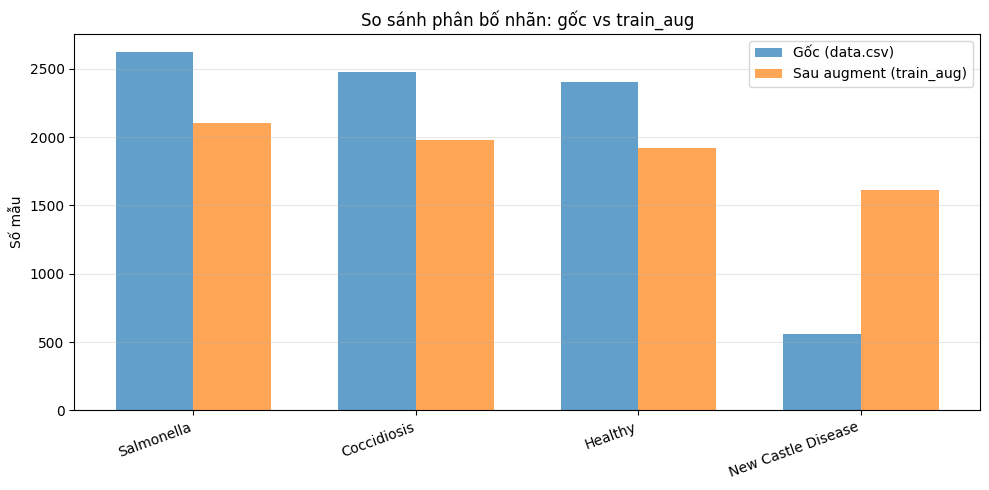


Phân bố nhãn trong train_aug:
  Salmonella               :  2100 (27.57%)
  Coccidiosis              :  1981 (26.01%)
  Healthy                  :  1923 (25.25%)
  New Castle Disease       :  1613 (21.18%)


In [13]:
# TRỰC QUAN HÓA PHÂN BỐ NHÃN TRONG train_aug.csv

TRAIN_AUG_CSV = DATA_DIR / 'train_aug.csv'
print('Đang đọc train_aug.csv từ:', TRAIN_AUG_CSV)
train_aug_df = pd.read_csv(TRAIN_AUG_CSV)
print('Số mẫu train_aug:', len(train_aug_df))

# Phân bố nhãn sau augment
aug_counts = train_aug_df['label'].value_counts().sort_values(ascending=False)
orig_counts = df['label'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
x = np.arange(len(aug_counts))
width = 0.35

plt.bar(x - width/2, orig_counts[aug_counts.index], width, label='Gốc (data.csv)', alpha=0.7)
plt.bar(x + width/2, aug_counts.values, width, label='Sau augment (train_aug)', alpha=0.7)

plt.xticks(x, aug_counts.index, rotation=20, ha='right')
plt.ylabel('Số mẫu')
plt.title('So sánh phân bố nhãn: gốc vs train_aug')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print('\nPhân bố nhãn trong train_aug:')
for lbl, cnt in aug_counts.items():
    print(f"  {lbl:25s}: {cnt:5d} ({cnt/len(train_aug_df)*100:5.2f}%)")


Số ảnh NCD augment: 1164


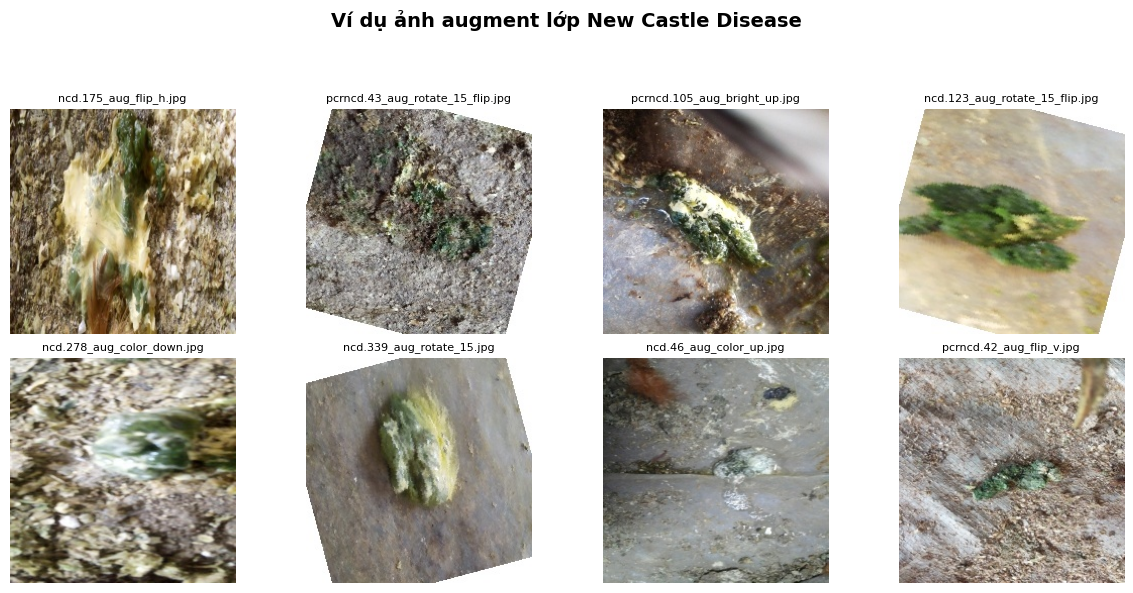

In [14]:
# HIỂN THỊ MỘT SỐ ẢNH AUGMENTED CỦA LỚP NCD

from math import ceil

ncd_label = 'New Castle Disease'

# Lọc các ảnh augmented (tên chứa '_aug_')
aug_ncd_df = train_aug_df[(train_aug_df['label'] == ncd_label) &
                          (train_aug_df['images'].str.contains('_aug_'))]
print('Số ảnh NCD augment:', len(aug_ncd_df))

num_show = 8
sample_df = aug_ncd_df.sample(min(num_show, len(aug_ncd_df)), random_state=42)

cols = 4
rows = ceil(len(sample_df) / cols)
plt.figure(figsize=(3*cols, 3*rows))
plt.suptitle(f'Ví dụ ảnh augment lớp {ncd_label}', fontsize=14, fontweight='bold')

for i, (_, row) in enumerate(sample_df.iterrows()):
    img_name = row['images']
    img_path = IMAGES_DIR / img_name
    plt.subplot(rows, cols, i+1)
    if img_path.exists():
        img = Image.open(img_path).convert('RGB')
        plt.imshow(img)
        plt.title(img_name, fontsize=8)
    else:
        plt.text(0.5, 0.5, f'Không tìm thấy\n{img_name}', ha='center', va='center')
    plt.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()
